In [37]:
# Importación de librerías

import numpy as np
import pandas as pd
import sklearn.compose as Compose
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
from sklearn.feature_extraction.text import CountVectorizer


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb
import re


In [83]:
train_url = "https://raw.githubusercontent.com/Kekon130/ML_Practica2/main/train.csv"
df_train = pd.read_csv(train_url)

test_url = "https://raw.githubusercontent.com/Kekon130/ML_Practica2/main/test.csv"
df_test = pd.read_csv(test_url)
submission = df_test[['ID']].copy()
#pd.set_option('display.max_columns', None)
df_test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,99246,4759,1,Edwardsz,45.0,169291865.0,Manager,57738.060,4881.505000,9.0,...,11.0,Bad,3916.47,22.899499,157.0,Yes,296.284136,53.821178,Low_spent_Medium_value_payments,71.427393
1,90071,2573,6,Stevenw,42.0,655780925.0,Scientist,19205.485,1828.457083,5.0,...,3.0,Good,372.06,24.585730,241.0,No,39.417086,19.311009,Low_spent_Small_value_payments,211.447299
2,64375,34237,2,Dalaly,32.0,55005463.0,Scientist,49768.710,4045.392500,7.0,...,11.0,Standard,1428.04,25.129810,168.0,Yes,225.693491,50.036548,Low_spent_Small_value_payments,198.465986
3,142441,47128,8,Lashx,24.0,958087164.0,Lawyer,62424.120,5010.010000,7.0,...,6.0,Standard,1958.36,27.004401,154.0,Yes,175.360317,55.101365,High_spent_Large_value_payments,472.761456
4,135010,21542,5,Toonkelz,22.0,862456731.0,Entrepreneur,128163.360,10648.280000,5.0,...,5.0,Good,1494.56,30.911401,222.0,No,281.792301,77.036872,Low_spent_Large_value_payments,536.997743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,126990,43904,1,Wayneo,42.0,448192628.0,Scientist,37760.220,3393.685000,3.0,...,3.0,Good,821.10,23.938159,194.0,No,88.485663,37.562828,High_spent_Medium_value_payments,426.575752
19996,128347,8248,2,Daria Sito-Sucicd,32.0,563291145.0,Mechanic,29818.780,2257.898333,4.0,...,4.0,Good,702.20,30.990148,376.0,No,45.977299,27.931177,High_spent_Small_value_payments,298.961882
19997,88941,19882,4,Laurend,43.0,451289406.0,Lawyer,34744.150,2784.345833,3.0,...,3.0,Good,219.59,36.911828,398.0,No,52.218894,67.741940,Low_spent_Medium_value_payments,336.382928
19998,89599,50969,2,Nickx,35.0,994774680.0,Media_Manager,60271.920,4782.660000,6.0,...,11.0,Bad,4546.95,32.122843,96.0,Yes,203.605795,36.776460,High_spent_Medium_value_payments,381.365614


Observamos que la variable objetivo puede tomar 3 valores distintos: good, bad y standard.

In [ ]:
df_train.Credit_Mix.unique()

array(['Good', 'Bad', 'Standard'], dtype=object)

In [ ]:
# Se incluyen: Credit mix
df_train.corr()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
ID,1.000000,0.001964,-0.000512,0.004816,0.013041,-0.005183,-0.004815,0.004798,-0.000168,0.004468,...,-0.002868,-0.002108,0.003183,-0.003645,-0.007157,0.001626,-0.006065,-0.003628,0.000855,0.006808
Customer_ID,0.001964,1.000000,-0.000323,-0.002801,0.003594,0.011975,0.011382,-0.001796,-0.005120,-0.004277,...,0.000927,-0.003462,0.005812,-0.000656,-0.016200,-0.003824,0.022938,0.016681,-0.000210,0.004370
Month,-0.000512,-0.000323,1.000000,0.017511,-0.001043,-0.000079,-0.002038,0.000818,0.000800,-0.001164,...,0.140411,-0.001163,-0.000559,0.000778,0.023094,0.002290,0.049854,-0.000261,-0.001185,0.015373
Age,0.004816,-0.002801,0.017511,1.000000,-0.011201,0.090233,0.089416,-0.190555,-0.149863,-0.218679,...,-0.250600,0.243550,-0.201705,0.023244,0.233662,0.183636,-0.048402,0.069021,0.113161,0.158811
SSN,0.013041,0.003594,-0.001043,-0.011201,1.000000,-0.006981,-0.007249,0.011365,-0.002847,0.005886,...,-0.006840,-0.008205,0.004868,0.003388,-0.004394,-0.006284,-0.004392,-0.002002,-0.001824,0.005588
Annual_Income,-0.005183,0.011975,-0.000079,0.090233,-0.006981,1.000000,0.998159,-0.281876,-0.218327,-0.301307,...,-0.280101,0.342501,-0.267304,0.175747,0.274049,0.204822,0.438742,0.806099,0.626568,0.212140
Monthly_Inhand_Salary,-0.004815,0.011382,-0.002038,0.089416,-0.007249,0.998159,1.000000,-0.281186,-0.217318,-0.300959,...,-0.279706,0.341355,-0.267014,0.175875,0.273272,0.204402,0.422420,0.807262,0.627700,0.209263
Num_Bank_Accounts,0.004798,-0.001796,0.000818,-0.190555,0.011365,-0.281876,-0.281186,1.000000,0.442708,0.583717,...,0.518113,-0.724096,0.506809,-0.070431,-0.484647,-0.390178,0.052052,-0.226031,-0.285286,-0.386351
Num_Credit_Card,-0.000168,-0.005120,0.000800,-0.149863,-0.002847,-0.218327,-0.217318,0.442708,1.000000,0.498413,...,0.459463,-0.545055,0.491301,-0.057726,-0.418541,-0.275945,0.059371,-0.175497,-0.232813,-0.403647
Interest_Rate,0.004468,-0.004277,-0.001164,-0.218679,0.005886,-0.301307,-0.300959,0.583717,0.498413,1.000000,...,0.631146,-0.752571,0.629239,-0.076424,-0.576542,-0.425407,0.072822,-0.241401,-0.316302,-0.484015



# Analizando las columnas

A continuación se define una función para redondear los valores y graficarlos con mayor comodidad.  

In [ ]:
def transformar_valores(columna, decimal):
  for index, row in df_train.iterrows():
    df_train.loc[index, columna] = round(df_train.loc[index, columna], decimal)



transformar_valores("Annual_Income", -4)
transformar_valores("Monthly_Inhand_Salary", -3)
transformar_valores("Changed_Credit_Limit", -1)
transformar_valores("Outstanding_Debt", -2)
transformar_valores("Credit_Utilization_Ratio", 1)
transformar_valores("Total_EMI_per_month", -1)
transformar_valores("Amount_invested_monthly", -1)
transformar_valores("Monthly_Balance", -2)


### Month
Representa el mes del año en el que se actualizó la información

In [81]:
plot = pd.crosstab(index=df_train['Month'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])


KeyError: ignored

Podemos ver cómo el mes no influye casi nada, los valores están prácticamente igual repartidos.

### Name
Esta variable la vamos a borrar, ya que tiene bastantes menos valores que el Customer_ID y ello puede dar problemas para el tratamiento posterior. Además no nos aporta nada.

### Age

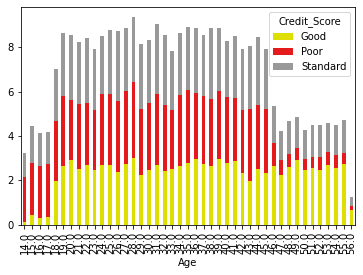

In [ ]:
plot = pd.crosstab(index=df_train['Age'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

Clasificamos la edad en tres grupos (va desde los 14 años hasta los 59)  <br>      -juventud (14 - 26)           
-adultez (27 - 40)          
-otro (41 - 59)

### SSN

In [84]:
print(df_train.Customer_ID.nunique() == df_train.SSN.nunique())

True


Ambos devuelven tienen el mismo numero, por lo que se entiende que cada SSN va ligado a un mismo cliente. No aporta información.

### Occupation


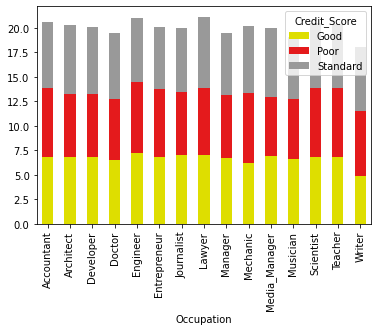

In [ ]:
output = pd.crosstab(df_train["Credit_Score"], df_train["Occupation"])
output

plot = pd.crosstab(index=df_train['Occupation'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

Es bastante estable en todos los campos, aporta poca información.

### Annual_Income

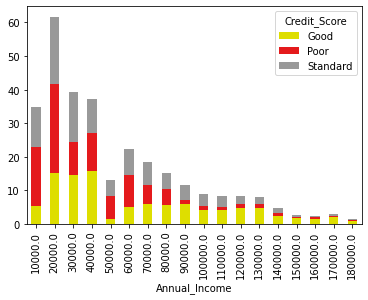

In [ ]:
plot = pd.crosstab(index=df_train['Annual_Income'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

Parece seguir una distribución gamma, por lo que conviene mantener el valor discreto, mayormente por la disparidad, ya que en caso contrario se perdería información.

### Monthly_Inhand_Salary
Aquí haremos lo mismo que en los ingresos anuales, pero redonderaremos a 1000 

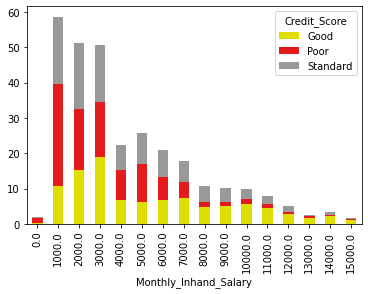

In [ ]:
plot = pd.crosstab(index=df_train['Monthly_Inhand_Salary'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])



Se obtienen resultados muy similares a la columna anterior.

### Num_Bank_Accounts

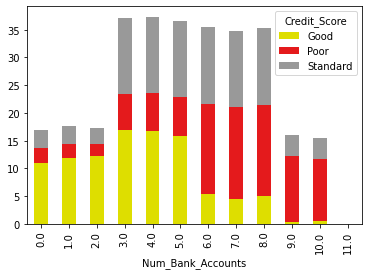

In [ ]:
plot = pd.crosstab(index=df_train['Num_Bank_Accounts'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

Podemos observar que existe una relación alta entre los casos con un número alto de cuentas bancarias y un Credit_Score peor. Los valores se distribuyen uniformemente entre 0-2, 3-5, 6-8 y 9-10.

### Num_Credit_Card


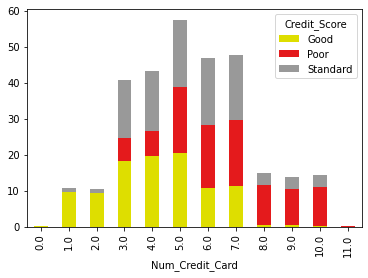

In [ ]:
plot = pd.crosstab(index=df_train['Num_Credit_Card'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

Tiene una forma y distribución muy similares a la anterior, en los "rangos" 0-2, 3-4, 5-7 y 8-10. Su alta correlación con la columna anterior explica el parecido.

### Interest_Rate

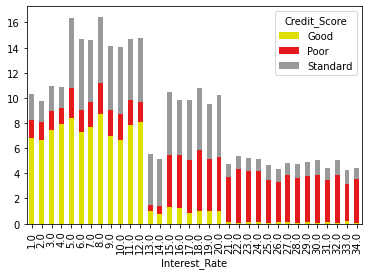

In [86]:
plot = pd.crosstab(index=df_train['Interest_Rate'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

Parece que más interés, más pobre 5 grupos claros. 1-4 5-12 13-14 15-20 21-34

### Num_of_Loan

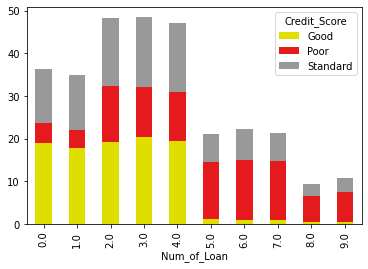

In [87]:
plot = pd.crosstab(index=df_train['Num_of_Loan'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

Parece que se distribuye de manera uniforme, solo que a más préstamos activos, más pobre es la puntuación. En este caso podría dividirse, más o menos, en grupos 0-1, 2-4 y 5-9.

### Delay_from_due_date
Número medio de días de retraso en el pago


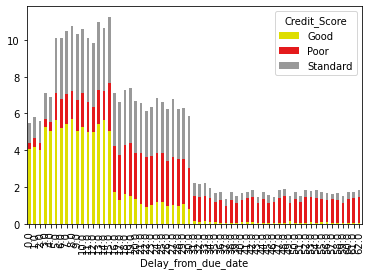

In [ ]:
plot = pd.crosstab(index=df_train['Delay_from_due_date'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

Podría separarse en 4 grupos. Se han realizado pruebas separando en 4 grupos y calculando el tiempo en meses (división entre 30 y redondear) con resultados poco favorables, ya que se produce pérdida de información.

### Num_of_Delayed_Payment
Número medio de pagos atrasados del cliente

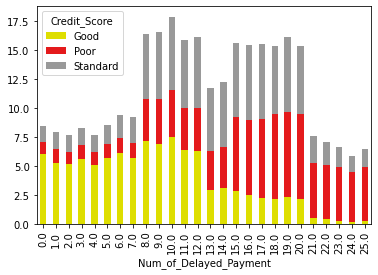

In [88]:
plot = pd.crosstab(index=df_train['Num_of_Delayed_Payment'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

De forma similar a las anteriores, podría aproximarse a 4 grupos, 0-7, 8-14, 15-20, 21-25.

### Changed_Credit_Limit
Porcentaje de cambio en los límites de gasto del cliente

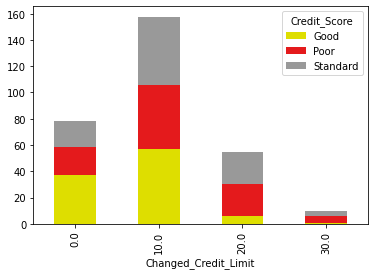

In [ ]:
plot = pd.crosstab(index=df_train['Changed_Credit_Limit'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

No varía mucho, pero parece ser que a menor porcentaje más probable que resulte en "Good".

### Num_Credit_Inquiries
Número de consultas sobre tarjetas de crédito realizadas por el cliente.


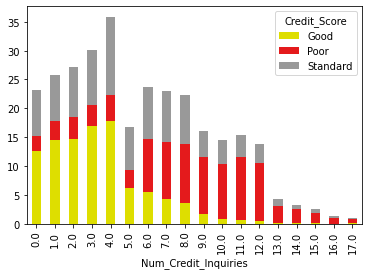

In [ ]:
plot = pd.crosstab(index=df_train['Num_Credit_Inquiries'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

Puede ser útil mantenerla como valores continuos.

### Credit_Mix

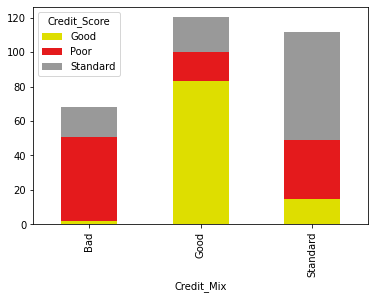

In [ ]:
plot = pd.crosstab(index=df_train['Credit_Mix'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

Cuanto más "good" es, más probable recibir "good" de puntuación crediticia.

### Outstanding_Debt
Deuda en dólares

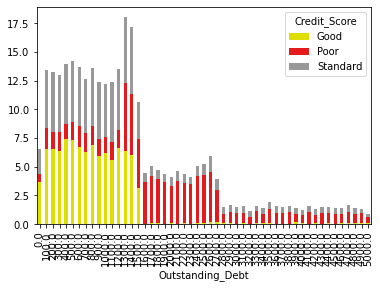

In [ ]:
plot = pd.crosstab(index=df_train['Outstanding_Debt'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

A partir de la deuda de 1600 dólares, todos tienen un resultado muy pobre. Se ha probado a concentrar en un solo grupo las deudas de más de 1600 dólares, pero se pierde precisión por una ligera pérdida de información.

### Credit_Utilization_Ratio
Tasa de utilización del préstamo

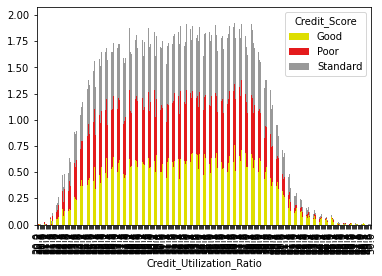

In [ ]:
plot = pd.crosstab(index=df_train['Credit_Utilization_Ratio'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

Parece una distribución normal, puede ser interesante mantenerlo como valores continuos.

### Credit_History_Age
Antigüedad del historial de crédito.


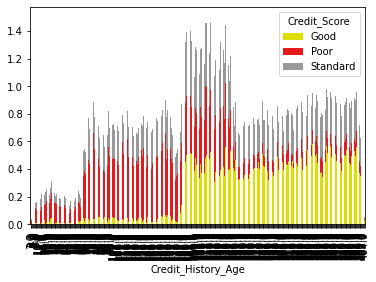

In [ ]:
plot = pd.crosstab(index=df_train['Credit_History_Age'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

También interesa mantenerla continua por la alta cantidad de información que proporciona.

### Payment_of_Min_Amount
Representa si la persona sólo ha pagado el importe mínimo.

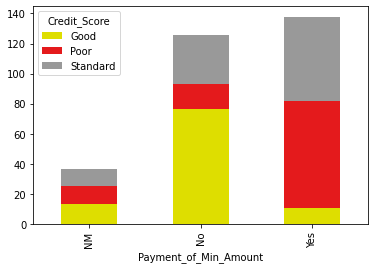

In [ ]:
plot = pd.crosstab(index=df_train['Payment_of_Min_Amount'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])        

Variable categórica.

### Total_EMI_per_month

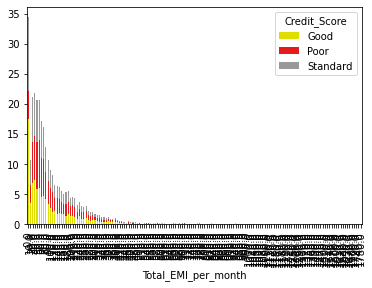

In [ ]:
plot = pd.crosstab(index=df_train['Total_EMI_per_month'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

### Amount_invested_monthly
Inversión mensual

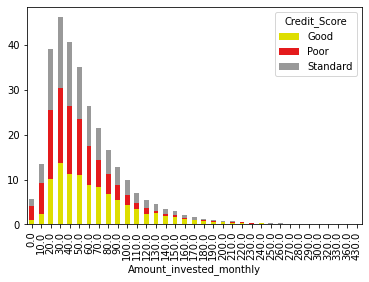

In [ ]:
plot = pd.crosstab(index=df_train['Amount_invested_monthly'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

Parece que a menor cantidad invertida, más pobre es la puntuación. Se mantiene continua también por la misma razón que la anterior.

### Payment_Behaviour
Comportamiento del pago



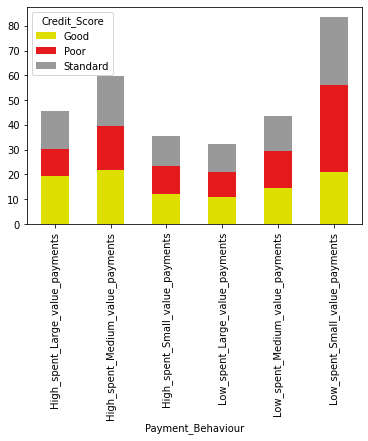

In [ ]:
plot = pd.crosstab(index=df_train['Payment_Behaviour'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

Sería interesante utilizar un OneHotEncoder aquí.

### Monthly_Balance
Balance mensual

In [ ]:
plot = pd.crosstab(index=df_train['Monthly_Balance'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

A mayor balance, mayor puntuación. Conviene mantenerla continua también.

# Pre procesamiento

Se eliminan las columnas que no aportan información, distingubles a simple vista. Estas son columnas contienen valores identificadores.

In [39]:
df_train = df_train.drop('Month', axis=1)
df_train = df_train.drop('Name', axis=1)
df_train = df_train.drop('SSN', axis=1)
df_train = df_train.drop('Occupation', axis=1)
df_train = df_train.drop('ID', axis=1)
df_train = df_train.drop('Customer_ID', axis=1)

Después de analizar la tabla de correlaciones obtenida anteriormente, se eliminan las columnas que tienen una correlación alta con otras, lo que significa que aportan poca información en conjunto. Dos columnas con alta correlación son sustituibles por una de ellas. Se ha considerado como alta la correlación a partir de 0.6.

In [40]:
# Columnas innecesarias después de analizar la tabla de correlaciones

df_train = df_train.drop('Credit_Utilization_Ratio', axis=1)
df_train = df_train.drop('Total_EMI_per_month', axis=1)
df_train = df_train.drop('Amount_invested_monthly', axis=1)
#df_train = df_train.drop('Payment_Behaviour', axis=1)            # empeora un 0.002 con esto :(
df_train = df_train.drop('Monthly_Balance', axis=1)
df_train = df_train.drop('Monthly_Inhand_Salary', axis=1)
df_train = df_train.drop('Age', axis=1)
df_train = df_train.drop('Outstanding_Debt', axis=1)


y = df_train['Credit_Score']


df_train = df_train.drop('Credit_Score', axis=1)

La columna Type_Of_Loan va se procesa de forma diferente a las demás, convirtiéndose cada tipo de préstamo en una columna de valores numéricos.

In [41]:
count_vectorizer = CountVectorizer(tokenizer = lambda x: re.sub(", ", ",", x).replace("and ", "").split(',')) 
data = count_vectorizer.fit_transform(df_train['Type_of_Loan'])
print(count_vectorizer.get_feature_names_out())

data_array = data.toarray()
#data_array[data_array > 1] = 1

df_train[count_vectorizer.get_feature_names_out()] = data_array

df_train = df_train.drop('Type_of_Loan', axis=1)

['auto loan' 'credit-builder loan' 'debt consolidation loan'
 'home equity loan' 'mortgage loan' 'no data' 'not specified'
 'payday loan' 'personal loan' 'student loan']


Se discretizan las columnas Num_Bank_Accounts, Num_Credit_Card, Num_of_Loan, Num_of_Delayed_Payment dividiéndolas en grupos, ya que en las gráficas anteriores muestran con claridad grupos distinguibles. Las demás columnas se han mantenido como valores continuos con la finalidad de evitar la pérdida de información.

In [42]:
dos_categorias = ["Bajo", "Alto"]
tres_categorias = ["Bajo", "Medio", "Alto"]
cuatro_categorias = ["Bajo", "Medio", "Alto", "Muy alto"]
cinco_categorias = ["Muy bajo", "Bajo", "Medio", "Alto", "Muy alto"]


valores = [-math.inf, 2, 5, 8, math.inf]
df_train["Num_Bank_Accounts"] = pd.cut(x=df_train["Num_Bank_Accounts"], bins=valores, labels=cuatro_categorias)

valores = [-math.inf, 2, 4, 7, math.inf]
df_train["Num_Credit_Card"] = pd.cut(x=df_train["Num_Credit_Card"], bins=valores, labels=cuatro_categorias)

valores = [-math.inf, 4, math.inf]
df_train["Num_of_Loan"] = pd.cut(x=df_train["Num_of_Loan"], bins=valores, labels=dos_categorias)

valores = [-math.inf, 7, 14, 20, math.inf]
df_train["Num_of_Delayed_Payment"] = pd.cut(x=df_train["Num_of_Delayed_Payment"], bins=valores, labels=cuatro_categorias)

In [43]:
oe = OrdinalEncoder()

df_train[['Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Credit_Mix', 'Payment_Behaviour', 'Payment_of_Min_Amount']] = oe.fit_transform(df_train[['Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Credit_Mix', 'Payment_Behaviour', 'Payment_of_Min_Amount']])

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df_test = pd.get_dummies(df_test)
df_train = normalize(df_train)

df_train

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,...,auto loan,credit-builder loan,debt consolidation loan,home equity loan,mortgage loan,no data,not specified,payday loan,personal loan,student loan
0,0.522475,0.333333,0.666667,0.212121,1.0,0.322581,0.666667,0.000678,0.176471,0.5,...,0.00,0.00,0.2,0.0,0.0,0.0,0.00,0.0,0.00,0.0
1,0.140846,0.000000,1.000000,0.787879,0.0,0.483871,1.000000,0.651289,0.352941,0.0,...,0.00,0.00,0.0,0.2,0.4,0.0,0.75,0.0,0.50,0.0
2,0.133922,0.000000,0.000000,0.878788,0.0,0.790323,0.000000,0.779851,0.588235,0.0,...,0.00,0.25,0.0,0.4,0.6,0.0,0.00,0.0,0.50,0.2
3,0.035230,0.000000,0.000000,0.151515,0.0,0.096774,0.000000,0.343962,0.470588,1.0,...,0.00,0.50,0.2,0.2,0.0,0.0,0.25,0.0,0.00,0.0
4,0.319732,0.000000,0.333333,0.515152,1.0,0.435484,0.666667,0.417910,0.529412,1.0,...,0.25,0.25,0.0,0.0,0.0,0.0,0.00,0.2,0.00,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.582464,0.666667,0.000000,0.242424,1.0,0.112903,0.000000,0.476934,0.176471,1.0,...,0.00,0.00,0.0,0.0,0.0,1.0,0.00,0.0,0.00,0.0
79996,0.053257,0.000000,0.000000,0.606061,0.0,0.709677,0.000000,0.287653,0.352941,0.0,...,0.00,0.50,0.0,0.2,0.2,0.0,0.00,0.0,0.25,0.0
79997,0.129314,0.666667,0.000000,0.151515,1.0,0.370968,0.666667,0.547829,0.411765,1.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.2,0.00,0.2
79998,0.212604,0.000000,1.000000,0.727273,0.0,0.516129,0.000000,0.046811,0.705882,0.0,...,0.25,0.25,0.0,0.2,0.0,0.0,0.50,0.4,0.25,0.0


Se repite el mismo proceso para el preprocesamiento del conjunto de datos de prueba.

# Pre procesamiento test
Análogo al preprocesamiento del conjunto de datos de entrenamiento.

In [44]:
# Columnas innecesarias
df_test = df_test.drop('Month', axis=1)
df_test = df_test.drop('Name', axis=1)
df_test = df_test.drop('SSN', axis=1)
df_test = df_test.drop('Occupation', axis=1)
df_test = df_test.drop('ID', axis=1)
df_test = df_test.drop('Customer_ID', axis=1)

In [45]:
# Columnas innecesarias después de analizar la tabla de correlaciones
df_test = df_test.drop('Credit_Utilization_Ratio', axis=1)
df_test = df_test.drop('Total_EMI_per_month', axis=1)
df_test = df_test.drop('Amount_invested_monthly', axis=1)
#df_test = df_test.drop('Payment_Behaviour', axis=1)
df_test = df_test.drop('Monthly_Balance', axis=1)
df_test = df_test.drop('Monthly_Inhand_Salary', axis=1)
#df_test = df_test.drop('Type_of_Loan', axis=1)
df_test = df_test.drop('Age', axis=1)
df_test = df_test.drop('Outstanding_Debt', axis=1)


In [46]:
# Procesamiento de la columna TypeOfLoan
count_vectorizer = CountVectorizer(tokenizer = lambda x: re.sub(", ", ",", x).replace("and ", "").split(',')) 
data = count_vectorizer.fit_transform(df_test['Type_of_Loan'])
print(count_vectorizer.get_feature_names_out())

data_array = data.toarray()
#data_array[data_array > 1] = 1

df_test[count_vectorizer.get_feature_names_out()] = data_array

df_test = df_test.drop('Type_of_Loan', axis=1)

['auto loan' 'credit-builder loan' 'debt consolidation loan'
 'home equity loan' 'mortgage loan' 'no data' 'not specified'
 'payday loan' 'personal loan' 'student loan']


In [47]:
dos_categorias = ["Bajo", "Alto"]
tres_categorias = ["Bajo", "Medio", "Alto"]
cuatro_categorias = ["Bajo", "Medio", "Alto", "Muy alto"]
cinco_categorias = ["Muy bajo", "Bajo", "Medio", "Alto", "Muy alto"]


valores = [-math.inf, 2, 5, 8, math.inf]
df_test["Num_Bank_Accounts"] = pd.cut(x=df_test["Num_Bank_Accounts"], bins=valores, labels=cuatro_categorias)

valores = [-math.inf, 2, 4, 7, math.inf]
df_test["Num_Credit_Card"] = pd.cut(x=df_test["Num_Credit_Card"], bins=valores, labels=cuatro_categorias)

valores = [-math.inf, 4, math.inf]
df_test["Num_of_Loan"] = pd.cut(x=df_test["Num_of_Loan"], bins=valores, labels=dos_categorias)

valores = [-math.inf, 7, 14, 20, math.inf]
df_test["Num_of_Delayed_Payment"] = pd.cut(x=df_test["Num_of_Delayed_Payment"], bins=valores, labels=cuatro_categorias)

In [48]:
oe = OrdinalEncoder()

df_test[['Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Credit_Mix', 'Payment_Behaviour', 'Payment_of_Min_Amount']] = oe.fit_transform(df_test[['Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Credit_Mix', 'Payment_Behaviour', 'Payment_of_Min_Amount']])

df_test = pd.get_dummies(df_test)
df_test = normalize(df_test)

df_test

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,...,auto loan,credit-builder loan,debt consolidation loan,home equity loan,mortgage loan,no data,not specified,payday loan,personal loan,student loan
0,0.293281,1.000000,1.000000,0.878788,0.0,0.983871,1.000000,0.670624,0.647059,0.0,...,0.00,0.25,0.0,0.2,0.2,0.0,0.00,0.6,0.5,0.25
1,0.070525,0.666667,0.000000,0.000000,1.0,0.016129,0.666667,0.356513,0.176471,0.5,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.4,0.0,0.50
2,0.247210,0.000000,0.000000,0.515152,0.0,0.403226,0.666667,0.094980,0.647059,1.0,...,0.00,0.75,0.2,0.0,0.0,0.0,0.00,0.0,0.0,0.50
3,0.320371,0.000000,1.000000,0.848485,0.0,0.903226,0.000000,0.647218,0.352941,1.0,...,0.00,0.00,0.6,0.0,0.2,0.0,0.00,0.2,0.0,0.00
4,0.700407,0.666667,0.000000,0.181818,1.0,0.225806,0.333333,0.281208,0.294118,0.5,...,0.25,0.00,0.0,0.2,0.0,0.0,0.25,0.0,0.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.177790,0.666667,0.666667,0.060606,1.0,0.016129,0.666667,0.376526,0.176471,0.5,...,0.00,0.00,0.2,0.2,0.0,0.0,0.25,0.0,0.0,0.00
19996,0.131880,0.666667,0.666667,0.181818,1.0,0.080645,0.333333,0.186228,0.235294,0.5,...,0.00,0.25,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.25
19997,0.160354,0.666667,0.333333,0.060606,1.0,0.016129,0.666667,0.067164,0.176471,0.5,...,0.00,0.25,0.0,0.2,0.0,0.0,0.00,0.0,0.0,0.25
19998,0.307929,0.000000,0.000000,0.787879,0.0,0.483871,1.000000,0.961669,0.647059,0.0,...,0.00,0.25,0.2,0.0,0.2,0.0,0.00,0.2,0.0,0.50


# Entrenamiento

Se convierte a valores numéricos la variable objetivo

In [49]:
credit_score = y
credit_score_ordinal = []
for row in credit_score:
  if row == "Poor":
    credit_score_ordinal.append(0)
  if row == "Standard":
    credit_score_ordinal.append(1)
  if row == "Good":
    credit_score_ordinal.append(2)
y = credit_score_ordinal

Se ha elegido el clasificador XGBoost, algoritmo de boosting, por el rendimiento superior en comparación a otros modelos con el mismo preprocesamiento.

Vamos a utilizar un grid search para encontrar la combinación óptima de parámetros.

In [59]:
import xgboost
from sklearn.model_selection import train_test_split


X = df_train  #.iloc[:,:-1]
y = credit_score_ordinal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Se define el clasificador que determinará la calidad de la combinación de parámetros dentro del grid search:
estimador = xgboost.XGBClassifier(
                learning_rate=0.02,
                n_estimators=10,
                objective='binary:logistic',       # 600 estimators
                silent=True, nthread=1
)

# Matriz de parámetros para realizar combinaciones:
params = {
    'max_depth': [6, 9],                                  # profundidad de los árboles
    'learning_rate': [0.001, 0.01, 0.1],                  # tasa de aprendizaje, para la actualización respecto de los árboles generados
    'gamma': [0.01, 0.1],
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
    'booster': ['gbtree', 'dart']
}

gs2 = RandomizedSearchCV(estimator=estimador,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=5,
                             n_jobs=4,
                             verbose=1)

gs2.fit(X_train, y_train) 


print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best score: 0.7218283582089553
Best score: {'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.01, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.7999999999999999, 'booster': 'gbtree'}


Se prueba la combinación de parámetros con un clasificador XGBoost entrenando y probando.

In [78]:
from sklearn.metrics import f1_score


xgb_con_grisearch = xgboost.XGBClassifier(
    max_depth=9,
    learning_rate=0.1,
    gamma=0.01,
    n_estimators=300,
    reg_alpha=1.1,
    colsample_bytree = 0.7999999999999999, #0.9, 
    colsample_bylevel = 0.7999999999999999,
    booster='gbtree',
    subsample = 0.75,
    n_jobs = 5,
    objective='multi:softmax',
    num_class=3,
    random_state=42
)


xgb_con_grisearch.fit(X_train, y_train) 

y_pred = xgb_con_grisearch.predict(X_train)                         # train
y_pred_test = xgb_con_grisearch.predict(X_test)
y_pred_dftest = xgb_con_grisearch.predict(df_test)


print(f1_score(y_train, y_pred, average="macro"))                   # train
print(f1_score(y_test, y_pred_test, average="macro"))               # test

0.924338536055837
0.777552200997377


Sin embargo, definiendo un 'objective' y aumentando los parámetros colsample ligeramente, el modelo gana algo de precisión:

In [80]:
xgb_sin_gridsearch = xgboost.XGBClassifier(
    max_depth=9,
    learning_rate=0.1,
    n_estimators=300,
    reg_alpha=1.1,
    colsample_bytree = 0.9, 
    subsample = 0.9,
    n_jobs = 5,
    objective='multi:softmax',
    num_class=3,
    random_state=42
)


xgb_sin_gridsearch.fit(X_train, y_train) 

y_pred = xgb_sin_gridsearch.predict(X_train)                         # train
y_pred_test = xgb_sin_gridsearch.predict(X_test)
y_pred_dftest = xgb_sin_gridsearch.predict(df_test)

print(f1_score(y_train, y_pred, average="macro"))                   # train
print(f1_score(y_test, y_pred_test, average="macro"))               # test

0.924338536055837
0.777552200997377


## Random Forest (NO)

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# https://medium.com/analytics-vidhya/random-forest-classifier-and-its-hyperparameters-8467bec755f6

X = df_train.iloc[:,:-1]

# Fitting Random Forest Classification to the Training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42, max_depth = 9, max_features = 10)
classifier.fit(X_train, y_train)

y_pred_train = classifier.predict(X_train)
y_pred = classifier.predict(X_test)
y_pred_test = classifier.predict(df_test)

from sklearn.metrics import f1_score
print(f1_score(y_train, y_pred_train, average=None))
print(f1_score(y_test, y_pred, average=None))
# print(f"The score is: {f1}") 

[0.72653612 0.76910592 0.62250119]
[0.70596699 0.7515832  0.5990991 ]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# Hyperparameter Tuning to improve Accuracy

# https://www.kaggle.com/code/akshaysharma001/naive-bayes-with-hyperpameter-tuning



from sklearn.naive_bayes import CategoricalNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
clf = CategoricalNB(alpha=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


IndexError: ignored

# Otros

In [74]:
submission['Credit_Score'] = y_pred_dftest

submission.to_csv("ML_GRUPO7.csv", index=False)

In [75]:
submission.Credit_Score = submission.Credit_Score.replace({0: "Poor", 1: "Standard", 2: "Good"})

In [76]:
from google.colab import files
submission.to_csv('submission_grupo7.csv', index=False) 
files.download('submission_grupo7.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Fuentes

https://es.stackoverflow.com/questions/398654/como-ordenar-porcentajes-en-grafica-de-barras



Plot correlation in pandas

https://www.stackvidhya.com/plot-correlation-matrix-in-pandas-python/


Tablas y cosas chulas

https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/